Choose a model to train:
1. Random Forest
2. Support Vector Machine (SVM)
Enter your choice (1 or 2): 1
First few rows of the dataset:
      Scientific Name       Common Name Conservation Status  \
0  Loxodonta africana  African Elephant          Vulnerable   
1    Gorilla beringei  Mountain Gorilla          Endangered   
2        Panthera leo              Lion          Vulnerable   
3  Loxodonta africana  African Elephant          Vulnerable   
4    Gorilla beringei  Mountain Gorilla          Endangered   

   Endangered species detected  No. of animals  Human presence  
0                            0              52               1  
1                            1              94               0  
2                            1              38               1  
3                            0              16               0  
4                            0              54               1  
Missing values in each column:
 Scientific Name                0
Common Name                    

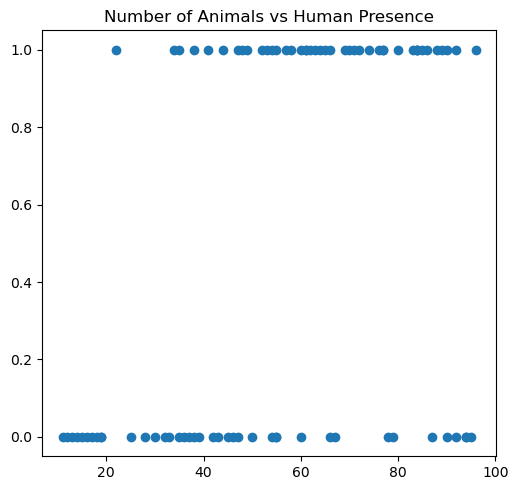

Do you want to train another model? (yes/no): yes
Choose a model to train:
1. Random Forest
2. Support Vector Machine (SVM)
Enter your choice (1 or 2): 2
First few rows of the dataset:
      Scientific Name       Common Name Conservation Status  \
0  Loxodonta africana  African Elephant          Vulnerable   
1    Gorilla beringei  Mountain Gorilla          Endangered   
2        Panthera leo              Lion          Vulnerable   
3  Loxodonta africana  African Elephant          Vulnerable   
4    Gorilla beringei  Mountain Gorilla          Endangered   

   Endangered species detected  No. of animals  Human presence  
0                            0              52               1  
1                            1              94               0  
2                            1              38               1  
3                            0              16               0  
4                            0              54               1  
Missing values in each column:
 Scientific Nam

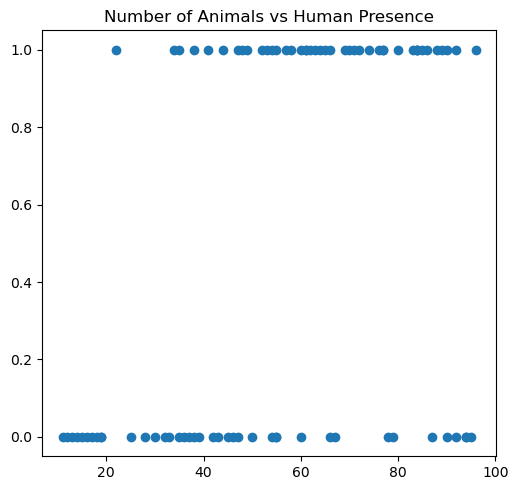

Do you want to train another model? (yes/no): no
Exiting the program. Goodbye!


In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

def load_data():
    # Loading the dataset
    df = pd.read_csv('WLP.csv')

    # Displaying the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Preprocessing steps
    # Checking for missing values
    print("Missing values in each column:\n", df.isnull().sum())

    # Fill or drop missing values
    df.fillna(method='ffill', inplace=True)

    # Checking and removing duplicates
    df.drop_duplicates(inplace=True)

    # One-hot encoding
    cat_cols = ['Common Name', 'Scientific Name', 'Conservation Status']
    df = pd.get_dummies(df, columns=cat_cols)

    # Feature selection
    target = 'Human presence'
    features = [col for col in df.columns if col != target]

    X = df[features]
    y = df[target]

    return train_test_split(X, y, test_size=0.2, random_state=42), df

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1 Score: {f1}')

def alert(model, X_train, new_data):
    new_data = pd.get_dummies(new_data)
    new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

    pred = model.predict(new_data)
    if pred == 1:
        print("Alert: Potential poaching activity detected!")
    else:
        print("No poaching activity detected.")

def plot_data(df):
    plt.figure(figsize=(15, 5))

    if 'Common Name' in df.columns:
        plt.subplot(1, 3, 1)
        df['Common Name'].value_counts().plot(kind='bar')
        plt.title('Number of Occurrences of Different Species')

    if 'Conservation Status' in df.columns:
        plt.subplot(1, 3, 2)
        df['Conservation Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Conservation Status Distribution')

    if 'No. of animals' in df.columns and 'Human presence' in df.columns:
        plt.subplot(1, 3, 3)
        plt.scatter(df['No. of animals'], df['Human presence'])
        plt.title('Number of Animals vs Human Presence')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    while True:
        print("Choose a model to train:")
        print("1. Random Forest")
        print("2. Support Vector Machine (SVM)")
        choice = input("Enter your choice (1 or 2): ")

        (X_train, X_test, y_train, y_test), df = load_data()

        if choice == '1':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model = train_model(model, X_train, y_train)
            joblib.dump(model, 'random_forest_model.pkl')
        elif choice == '2':
            model = SVC(kernel='linear', random_state=42)
            model = train_model(model, X_train, y_train)
            joblib.dump(model, 'svm_model.pkl')
        else:
            print("Invalid choice. Please choose 1 or 2.")
            continue

        eval_model(model, X_test, y_test)

        # Example of new data
        new_data = pd.DataFrame({
            'Endangered species detected': [1],
            'No. of animals': [5],
            'Human presence': [1],
        }).reindex(columns=X_train.columns, fill_value=0)

        alert(model, X_train, new_data)

        plot_data(df)

        # Ask the user if they want to train another model or exit
        retry = input("Do you want to train another model? (yes/no): ").lower()
        if retry != 'yes':
            print("Exiting the program. Goodbye!")
            break

if __name__ == "__main__":
    main()
